### Dependency installation

In [ ]:
!pip install trl
!pip uninstall transformers --Y
!pip install --no-cache-dir transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 25.8 MB/s eta 0:00:00

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --Y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 M

### Reading Wiki Dataset

In [ ]:
import json
import logging
import pandas as pd

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ilZo8_cbIp0GidXCzfojGwVsrGvEwiwP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ilZo8_cbIp0GidXCzfojGwVsrGvEwiwP" -O GPT-intro-processed.csv && rm -rf /tmp/cookies.txt

--2023-12-04 18:09:37--  https://docs.google.com/uc?export=download&confirm=t&id=1ilZo8_cbIp0GidXCzfojGwVsrGvEwiwP
Resolving docs.google.com (docs.google.com)... 142.251.171.100, 142.251.171.101, 142.251.171.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.171.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ah8qtdrcosctav4ek6oatkolpigln7u/1701713325000/02069688862007957170/*/1ilZo8_cbIp0GidXCzfojGwVsrGvEwiwP?e=download&uuid=ea2e425d-844f-479f-a3bd-ac3ba85dbeaa [following]
--2023-12-04 18:09:38--  https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ah8qtdrcosctav4ek6oatkolpigln7u/1701713325000/02069688862007957170/*/1ilZo8_cbIp0GidXCzfojGwVsrGvEwiwP?e=download&uuid=ea2e425d-844f-479f-a3bd-ac3ba85dbeaa
Resolving doc-0k-4k-docs.googleusercontent.com (doc-0k-4k-docs.googleusercontent.com)... 209.85.146.1

In [ ]:
file_path = 'GPT-intro-processed.csv'
df = pd.read_csv(file_path)
df.head(5)

,id,wiki_intro,generated_intro
0,63064638,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...
1,279621,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an..."
2,287229,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc..."
3,26712375,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...
4,38894426,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ..."


In [ ]:
alt_df=df.copy()

#### Get human text H corpus, AI-generated M corpus and Validation data

In [ ]:
# Get 10% of data as validation set
sample_size = int(0.10 * len(alt_df))
validate_df = alt_df.sample(n=sample_size, random_state=42)
alt_df = alt_df.drop(validate_df.index)
validate_df.head(10)

,id,wiki_intro,generated_intro
59770,28309756,The Benetton B187 is a Formula One racing car ...,The Benetton B187 is a Formula One racing car ...
21362,2387525,The Heliodisplay is an air-based display using...,The Heliodisplay is an air-based display using...
127324,15214263,"Mitochondrial carrier homolog 1 (MTCH1), also ...","Mitochondrial carrier homolog 1 (MTCH1), also ..."
140509,636846,"Calluna vulgaris, common heather, ling, or sim...","Calluna vulgaris, common heather, ling, or sim..."
144297,36667499,Berea–Midpark High School (BMHS) is a public h...,Berea–Midpark High School (BMHS) is a public h...
96370,8776164,Sparta Amfi is an indoor ice hockey rink locat...,Sparta Amfi is an indoor ice hockey rink locat...
49742,64656506,Jagdish Mahto was a naxal leader who led the B...,Jagdish Mahto was a naxal leader who was activ...
47389,31806743,"Barbara Fish Lee (born July 3, 1945) is an Ame...","Barbara Fish Lee (born July 3, 1945) is an Ame..."
58378,1856662,Volodymyr Antonovych (Ukrainian: Володимир Бон...,Volodymyr Antonovych (Ukrainian: Володимир Бон...
69047,32939850,Tiit is predominantly an Estonian masculine gi...,Tiit is predominantly an Estonian masculine gi...


In [ ]:
validate_df = validate_df.sample(frac=1).reset_index(drop=True)

# Select the first 10 rows from 'wiki_intro' and 'generated_intro'
validation_data = validate_df.loc[:9, ['wiki_intro', 'generated_intro']]

# Convert the selected rows to a list of tuples
validation_data = [tuple(x) for x in validation_data.values]

In [ ]:
# validation_data

## Baseline Implementation - RADAR on Wiki dataset

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForSequenceClassification, AdamW
import torch
import torch.optim as optim
import random
import numpy as np
from trl import PPOConfig,AutoModelForSeq2SeqLMWithValueHead,PPOTrainer,AutoModelForCausalLMWithValueHead,create_reference_model
from transformers import AutoTokenizer
from trl.core import respond_to_batch
import torch
import torch.nn.functional as F
from transformers import top_k_top_p_filtering

/usr/local/lib/python3.10/dist-packages/trl/trainer/ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Step 1: Paraphraser - Ensemble Paraphraser
https://huggingface.co/ramsrigouthamg/t5-large-paraphraser-diverse-high-quality

https://huggingface.co/eugenesiow/bart-paraphrase

https://huggingface.co/tuner007/pegasus_paraphrase

In [ ]:
paraphraser_model = AutoModelForSeq2SeqLMWithValueHead.from_pretrained('eugenesiow/bart-paraphrase').to(device)
paraphraser_tokenizer = AutoTokenizer.from_pretrained("eugenesiow/bart-paraphrase")
paraphraser_tokenizer.pad_token = paraphraser_tokenizer.eos_token
para_ref = create_reference_model(paraphraser_model).to(device)


In [ ]:
paraphraser2_model = AutoModelForSeq2SeqLMWithValueHead.from_pretrained('ramsrigouthamg/t5-large-paraphraser-diverse-high-quality').to(device)
paraphraser2_tokenizer = AutoTokenizer.from_pretrained("ramsrigouthamg/t5-large-paraphraser-diverse-high-quality")
paraphraser2_tokenizer.pad_token = paraphraser2_tokenizer.eos_token
para_ref2 = create_reference_model(paraphraser2_model).to(device)


In [ ]:
paraphraser3_model = AutoModelForSeq2SeqLMWithValueHead.from_pretrained('tuner007/pegasus_paraphrase').to(device)
paraphraser2_tokenizer = AutoTokenizer.from_pretrained("tuner007/pegasus_paraphrase")
paraphraser2_tokenizer.pad_token = paraphraser2_tokenizer.eos_token
para_ref2 = create_reference_model(paraphraser2_model).to(device)


In [ ]:
def get_paraphrase(text, paraphraser_model, paraphraser_tokenizer, device):
    text = "Enhance word choices to make the sentence sound more like a human: " + text + " </s"

    encoding = paraphraser_tokenizer.encode_plus(text, max_length=1024, truncation=False, return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

    paraphraser_model.eval()
    beam_outputs = paraphraser_model.generate(
        input_ids=input_ids, attention_mask=attention_mask,
        max_length=10000,
        early_stopping=False,
        num_beams=15,
        num_return_sequences=1
    )

    sent = paraphraser_tokenizer.decode(beam_outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return sent[len("paraphrasedoutput: "):]

In [ ]:
def get_paraphrase(text, paraphraser_model, paraphraser_tokenizer, device,inp_out = False):
    text = "Enhance word choices to make the sentence sound more like a human: " + text + " </s"
    pm = paraphraser_model.to(device)
    # print("Beginning paraphrasing")
    pt = paraphraser_tokenizer
    encoding = pt.encode_plus(text, max_length=1024, truncation=False, return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)
    # print("In the middle of paraphrasing")
    pm.eval()
    beam_outputs = pm.generate(
        input_ids=input_ids.to(device), attention_mask=attention_mask.to(device),
        max_length=1000,
        early_stopping=True,
        num_beams=4,
        num_return_sequences=1
    )
    # print("Ending paraphrasing")
    sent = pt.decode(beam_outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    # print(sent)
    if inp_out:
      return sent,input_ids,beam_outputs[0]
    else:
      return sent

In [ ]:
#paraphrase = get_paraphrase("Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. The station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business.")

#### Step 2: RoBERTa Detector (OpenAI)
https://huggingface.co/roberta-large-openai-detector

In [ ]:
detector_model = AutoModelForSequenceClassification.from_pretrained("roberta-large-openai-detector")
detector_tokenizer = AutoTokenizer.from_pretrained("roberta-large-openai-detector")
detector_model.to(device)

Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [ ]:
def classify_text(text):
    # Tokenize the text
    inputs = detector_tokenizer(text, return_tensors="pt").to(device)

    # Pass the text through the model
    with torch.no_grad():
        output = detector_model(**inputs)

    # Get the predicted label (1 if AI-generated and 0 if not)
    label = 1 if output.logits[0][0] > output.logits[0][1] else 0

    return label

In [ ]:
text = "Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. The station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business."
label = classify_text(text)
print(label)

0


### Step 3: Training with reward 

In [ ]:
# Initialize hyperparameters
max_steps = 2700  # Maximum training steps 100
batch_size = 200 #32
learning_rate = 1e-5
epsilon = 0.2
gamma = 1.0
lambda_val = 0.1

# Initialize replay buffer
replay_buffer = []

human_text_corpus = list(alt_df['wiki_intro'])
AI_text_corpus = list(alt_df['generated_intro'])

# Initialize the optimizer for the paraphraser model
paraphraser_optimizer = optim.Adam(paraphraser_model.parameters(), lr=learning_rate)

# Initialize the old action probabilities
old_action_prob = None

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
device = 'cpu'

In [ ]:

# Training Setup
ppo_config = PPOConfig(
    batch_size=2,
    max_steps = 20000,
    learning_rate = 1e - 5,
    lambda = 0.95,
)
ppotrainersteps = {0:[],1:[],2:[]}
loss_detector = []



In [ ]:
# Training Loop
detector_model.to(device)
for step in range(max_steps):
    torch.cuda.empty_cache()
    # Sample x_h and x_m from H and M, respectively
    x_h = human_text_corpus[np.random.randint(len(human_text_corpus))]
    x_m = AI_text_corpus[np.random.randint(len(AI_text_corpus))]

    # Calculate the reward using the detector model
    paraphrased_texts = []
    models = [paraphraser_model,paraphraser2_model,paraphraser3_model]
    tokenizers = [paraphraser_tokenizer,paraphraser2_tokenizer,paraphraser3_tokenizer]
    inputss = []
    outputss = []
    rewards = []
    for i in range(3):
        paraphrased_text = get_paraphrase(x_m, models[i], tokenizers[i], device,False)
        paraphrased_texts.append(paraphrased_text)
        ip = detector_tokenizer(paraphrased_text, return_tensors="pt", padding=True, truncation=True).to(device)
        inputss.append(ip)
        op = detector_model(**ip)
        outputss.append(op)
        # print(op)
        rewards.append([torch.tensor(torch.nn.functional.softmax(op.logits)[0][0].item())])
        # rewards.append([torch.tensor([0.0])] if op.logits[0][0] > op.logits[0][1] else [torch.tensor([1.0])])

    replay_buffer.append((x_h, x_m, paraphrased_texts, rewards))

    if len(replay_buffer) >= batch_size:

        paraphraser_model.train()
        paraphraser_optimizer.zero_grad()

        data = random.sample(replay_buffer, batch_size)
        x_p_texts = [item[2] for item in data]
        x_m_texts = [item[1] for item in data]
        # print(x_p_texts)
        # print(x_m_texts)
        # print(rewards)
        query_txt = x_m

        query_tensor = paraphraser_tokenizer(query_txt, return_tensors="pt").to(device)
        for i in range(3):

            # print(x_p_texts)
            # print(x_p_texts[0][i])
            # print(paraphraser_tokenizer(x_p_texts[0][i], return_tensors="pt").to(device))
            resp_tensor = paraphraser_tokenizer(x_p_texts[0][i], return_tensors="pt").to(device)['input_ids']
            # print(resp_tensor)
            # print(query_tensor)
            ppo_trainer = PPOTrainer(ppo_config, paraphraser_model, para_ref, paraphraser_tokenizer)

            # define a reward for response
            # (this could be any reward such as human feedback or output from another model)
            qt = query_tensor['input_ids']
            reward = rewards[i]
            print("Reward for model",i+1," ",reward)
            # train model for one step with ppo
            # print(qt)
            train_stats = ppo_trainer.step([qt[0]], [resp_tensor[0]], reward)
            print("PPO Val Loss : ",train_stats['ppo/loss/value'])
            ppotrainersteps[i].append(train_stats['ppo/loss/value'])


        # Train the detector model
        detector_model.train()
        optimizer = optim.AdamW(detector_model.parameters(), lr=learning_rate)
        x_h_texts = [item[0] for item in data]
        x_p_texts = [item[2] for item in data]
        inputs_m = []
        for i in range(3):
          # print(x_p_texts[i])
          inputs_m.append(detector_tokenizer(x_p_texts[i], return_tensors="pt", padding=True, truncation=True))
        labels_h = torch.zeros(len(data), dtype=torch.long).to(device)
        labels_m = torch.ones(len(data), dtype=torch.long).to(device)

        inputs_h = detector_tokenizer(x_h_texts, return_tensors="pt", padding=True, truncation=True)
        # inputs_m = detector_tokenizer(x_p_texts, return_tensors="pt", padding=True, truncation=True)
        # print(inputs_m)
        labels = torch.cat((labels_h, labels_m))

        outputs = detector_model(input_ids = inputs_h['input_ids'].to(device),attention_mask = inputs_h['attention_mask'].to(device),labels = labels_h )
        loss_h = outputs.loss
        # print(inputs_m[0]['input_ids'])
        outputs = detector_model(input_ids = inputs_m[0]['input_ids'].to(device),attention_mask = inputs_m[0]['attention_mask'].to(device),labels = labels_m )

        loss_m = outputs.loss

        outputs = detector_model(input_ids = inputs_m[1]['input_ids'].to(device),attention_mask = inputs_m[1]['attention_mask'].to(device),labels = labels_m )

        loss_m += outputs.loss
        loss_m = loss_m/2
        # print("Loss at iteration : ",step,loss_h.item())
        loss = loss_h + lambda_val * loss_m
        print("Loss at iteration ",step," : ",loss.item())
        loss_detector.append(loss.item())

        # Update the detector model
        loss.backward()
        optimizer.step()

        replay_buffer = []


You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Reward for model 1   [tensor(0.9725)]
PPO Val Loss :  0.06875472515821457
Reward for model 2   [tensor(0.8522)]
PPO Val Loss :  0.06969831883907318
Loss at iteration  1  :  0.21891622245311737
Reward for model 1   [tensor(0.9692)]
PPO Val Loss :  0.08431484550237656
Reward for model 2   [tensor(0.9649)]
PPO Val Loss :  0.18340185284614563
Loss at iteration  3  :  0.2946748733520508
Reward for model 1   [tensor(0.9347)]
PPO Val Loss :  0.14541038870811462
Reward for model 2   [tensor(0.9435)]
PPO Val Loss :  0.4491436779499054
Loss at iteration  5  :  0.23491127789020538
Reward for model 1   [tensor(0.9856)]
PPO Val Loss :  0.7491907477378845
Reward for model 2   [tensor(0.9160)]
PPO Val Loss :  2.0260419845581055
Loss at iteration  7  :  0.24234330654144287
Reward for model 1   [tensor(0.7208)]
PPO Val Loss :  0.10856316238641739
Reward for model 2   [tensor(0.8830)]
PPO Val Loss :  12.485381126403809
Loss at iteration  9  :  0.16579680144786835
Reward for model 1   [tensor(0.9880)]
PP

In [ ]:
saved_detector_model = detector_model
saved_paraphraser_model = paraphraser_model
saved_paraphraser2_model = paraphraser2_model
saved_paraphraser3_model = paraphraser3_model


In [ ]:
saved_detector_model.save_pretrained("saved_detector_model")
saved_paraphraser_model.save_pretrained("saved_paraphraser_model")
saved_paraphraser2_model.save_pretrained("saved_paraphraser2_model")
saved_paraphraser3_model.save_pretrained("saved_paraphraser3_model")

In [ ]:
saved_baseline_model = AutoModelForSequenceClassification.from_pretrained('baseline')
saved_baseline_tokenizer = AutoTokenizer.from_pretrained('baseline')

In [ ]:
RADAR_model = AutoModelForSequenceClassification.from_pretrained('TrustSafeAI/RADAR-Vicuna-7B')
RADAR_tokenizer = AutoTokenizer('TrustSafeAI/RADAR-Vicuna-7B')

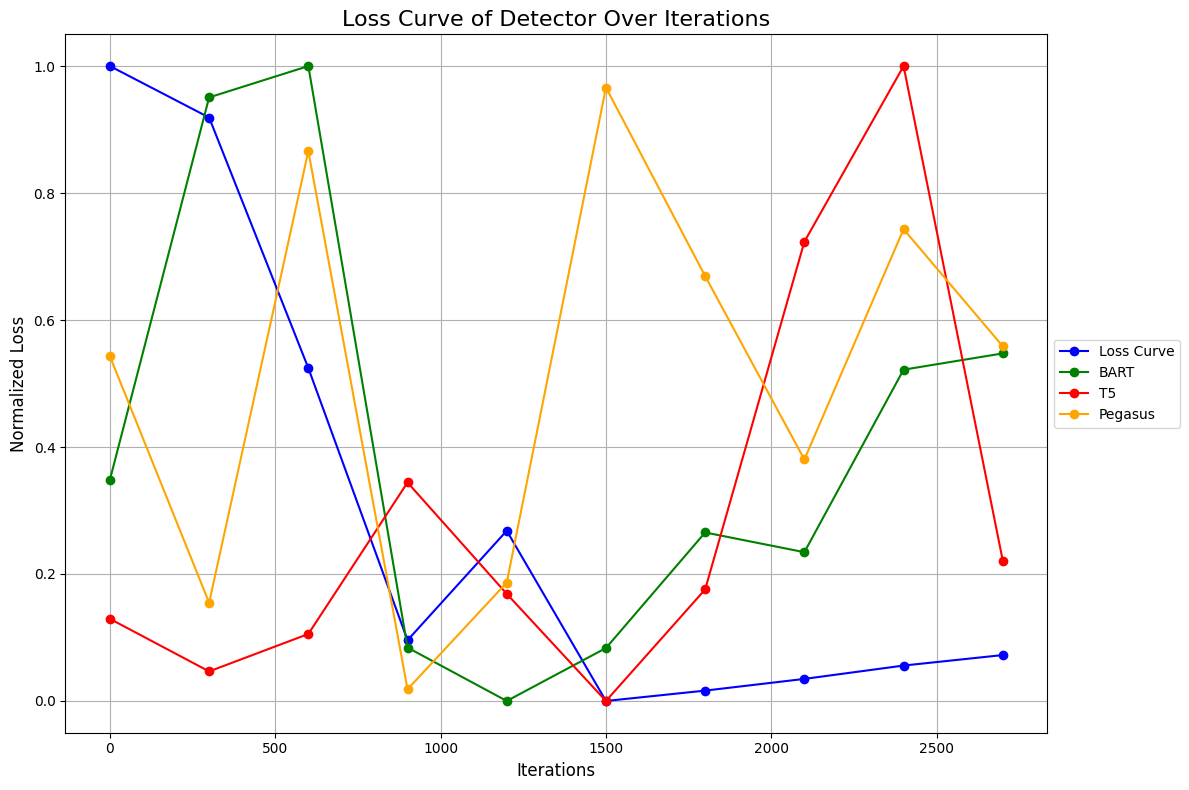

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))

iterations = list(np.arange(len(loss_detector))*300)
# Normalize individual data for separate lines
l = ppotrainersteps[0]
l_normalized = (l - np.min(l)) / (np.max(l) - np.min(l))

m = ppotrainersteps[1]
m_normalized = (m - np.min(m)) / (np.max(m) - np.min(m))

n = ppotrainersteps[1]
n_normalized = (n - np.min(n)) / (np.max(n) - np.min(n))

loss_detector = (loss_detector - np.min(loss_detector)) / (np.max(loss_detector) - np.min(loss_detector))
# Plot normalized loss curve
plt.plot(iterations, loss_detector, marker='o', linestyle='-', color='b', label='Loss Curve')

# Plot normalized individual data
plt.plot(iterations, l_normalized, marker='o', linestyle='-', color='g', label='BART')
plt.plot(iterations, m_normalized, marker='o', linestyle='-', color='r', label='T5')
plt.plot(iterations, n_normalized, marker='o', linestyle='-', color='orange', label='Pegasus')

# Set title and labels
plt.title('Loss Curve of Detector Over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Normalized Loss', fontsize=12)
plt.grid(True)

# Adjust legend location and format
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Show plot
plt.show()

### Step 4: Evaluating on Validation Dataset

In [ ]:
validate_df

,id,wiki_intro,generated_intro
0,56694597,Mikalai Dvornikau (Belarusian: Мікалай Мікалае...,Mikalai Dvornikau (Belarusian: Мікалай Мікалае...
1,42560060,Mary Osborn (born in 1940) is a L'Oréal-UNESCO...,Mary Osborn (born in 1940) is a painter and sc...
2,13347915,Tuomas Kantelinen (born 22 September 1969 in K...,Tuomas Kantelinen (born 22 September 1969 in H...
3,30174309,OpenNebula is a cloud computing platform for ...,OpenNebula is a cloud computing platform that...
4,202418,"The Atlantic puffin , also known as the common...","The Atlantic puffin , also known as the common..."
...,...,...,...
14995,31462577,The Café Bohemia is a jazz club located at 15 ...,The Café Bohemia is a jazz club located in the...
14996,6162151,"Baabda District (, transliteration: Qada' Baab...","Baabda District (, transliteration: Qada' Baab..."
14997,23739408,Lucien Leuwen is the second major novel writte...,Lucien Leuwen is the second major novel by Bel...
14998,16194652,"Perdón, viejita is a 1927 silent Argentine fil...","Perdón, viejita is a 1927 silent Argentine-Spa..."


In [ ]:
scores = []
logs = []
dt_od = detector_model.to(device)
for i in validate_df['wiki_intro']:
  tok = detector_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


for i in validate_df['generated_intro']:
  tok = detector_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


In [ ]:
radar_scores = []
logs = []
dt_od = RADAR_model.to(device)
for i in validate_df['wiki_intro']:
  tok = RADAR_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


for i in validate_df['generated_intro']:
  tok = RADAR_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


In [ ]:
baseline_score = []
logs = []
dt_od = saved_baseline_model.to(device)
for i in validate_df['wiki_intro']:
  tok = saved_baseline_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


for i in validate_df['generated_intro']:
  tok = saved_baseline_tokenizer(i,return_tensors="pt",padding = True,truncation = True).to(device)
  logits = dt_od(**tok).logits
  scores.append(1 if logits[0][0]>0.8 else 0)
  logs.append(logits[0][0])


In [ ]:
labels = [0]*50 + [1]*50

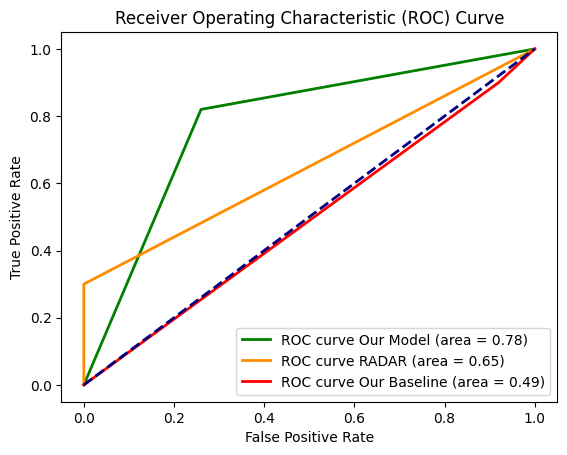

AUROC: 0.7799999999999999


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = label
y_score = scores
# Assuming 'y_true' contains true labels and 'y_score' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_true, y_score)
fpr1, tpr1, threshold1 = roc_curve(y_true, radar_score)
fpr2, tpr2, threshold2 = roc_curve(y_true, baseline_score)
roc_auc2 = auc(fpr2,tpr2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='g', lw=2, label='ROC curve Our Model (area = {:.2f})'.format(roc_auc))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve RADAR (area = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='red', lw=2, label='ROC curve Our Baseline (area = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUROC:', roc_auc)